### This notebook adds `survived` column to the Kaggle's `test.csv` file
via matching records with the original `titanic3.csv` file. Data obtained from https://hbiostat.org/data.

In [1]:
import pandas as pd

In [2]:
df_test=pd.read_csv('../data/original/test.csv')
df_titanic3=pd.read_csv('../data/original/titanic3.csv')
df_train=pd.read_csv('../data/original/train.csv')

In [3]:
df_test.shape, df_train.shape, df_titanic3.shape

((418, 11), (891, 12), (1309, 14))

### We use `name` to match records, but let's firts check if there are duplicatetd names...

In [4]:
df_titanic3[df_titanic3.name.duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


...and there are people with the same names, but can be distinguished by combining with other attributes, like `age`

### Let's check for the same for combined `train` and `test` dataframes from Kaggle
Let's call temporary dataframe `df_challenge`

In [5]:
df_challenge=pd.concat([df_train, df_test], ignore_index=True)

In [6]:
df_challenge[df_challenge.duplicated(subset=['Name'], keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [7]:
del [df_challenge]

### Merge `df_test` and `df_titanic3`

In [8]:
df_test_survived=df_test.merge(df_titanic3, how='left', 
                               left_on=['Name','Age'], right_on=['name','age']
                              )

...and check if all records get `survived` populated 

In [9]:
df_test_survived[df_test_survived.survived.isna()][['PassengerId','Name','survived']][:10]

,PassengerId,Name,survived
19,911,"Assaf Khalil, Mrs. Mariana (Miriam"")""",NaN
33,925,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",NaN
35,927,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",NaN
49,941,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",NaN
52,944,"Hocking, Miss. Ellen Nellie""""",NaN
104,996,"Thomas, Mrs. Alexander (Thamine Thelma"")""",NaN
108,1000,"Willer, Mr. Aaron (Abi Weller"")""",NaN
144,1036,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",NaN
225,1117,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",NaN
244,1136,"Johnston, Master. William Arthur Willie""""",NaN


There are issues with names contianing `"`, and the issue is already with the dataset downloaded from Kaggle 

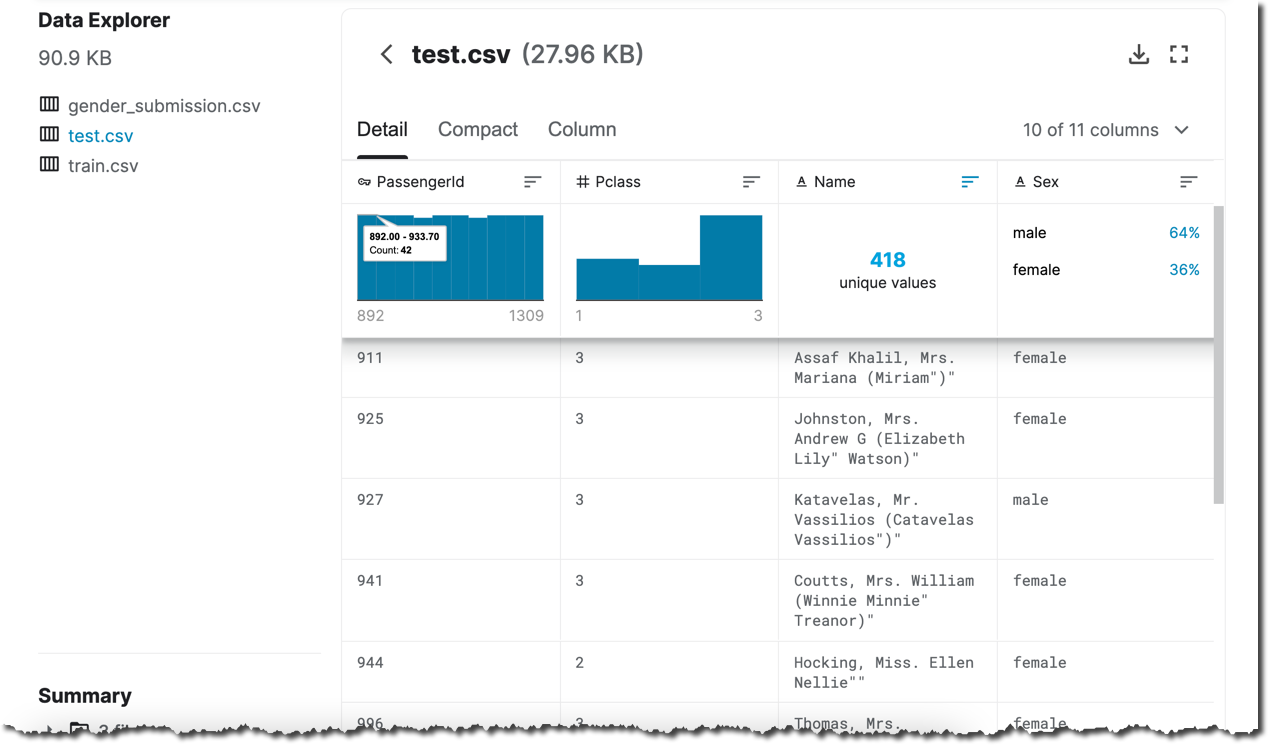 

While in `titanic3.csv` all quotes are in proper places 

In [10]:
df_titanic3[df_titanic3.name.str.contains('"')][:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
109,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"


## Merge two datasets after removing quotes from names

To be able to join two dataframes let's reindex them using a concatenation of a name with quotes remooved and a ticket 

In [11]:
df_titanic3_noquotes=df_titanic3.set_index(df_titanic3.name.str.replace('"','')+df_titanic3.ticket)
display(df_titanic3_noquotes[df_titanic3_noquotes.name.str.contains('"')][:3])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
"Barber, Miss. Ellen Nellie19877",1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,NaN,S,6,NaN,NaN
"Bradley, Mr. George (George Arthur Brayton)111427",1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.55,NaN,S,9,NaN,"Los Angeles, CA"
"Duff Gordon, Lady. (Lucille Christiana Sutherland) (Mrs Morgan)11755",1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.60,A16,C,1,NaN,London / Paris


In [12]:
df_test_noquotes=df_test.set_index(df_test.Name.str.replace('"','')+df_test.Ticket)
display(df_test_noquotes[df_test_noquotes.Name.str.contains('"')][:3])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
"Assaf Khalil, Mrs. Mariana (Miriam)2696",911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
"Johnston, Mrs. Andrew G (Elizabeth Lily Watson)W./C. 6607",925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Katavelas, Mr. Vassilios (Catavelas Vassilios)2682",927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C


In [13]:
df_test_survived=df_test_noquotes.merge(df_titanic3_noquotes, how='left', left_index=True, right_index=True)

Replace `survived` with `Survived` to be consistent

In [14]:
df_test_survived.rename(columns = {'survived':'Survived'}, inplace = True)

In [15]:
df_test_survived.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
pclass           int64
Survived         int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
boat            object
body           float64
home.dest       object
dtype: object

Output to `test_survived.csv` file only columns from ooriginal `test` dataset + a new `Survived` column

In [16]:
df_test_survived[df_test.columns.insert(len(df_test.columns),'Survived')].to_csv('../data/test_survived.csv', index=False)